In [109]:
import mediacloud.api
import configparser
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

config = configparser.ConfigParser()
config.read('config.ini')
mc_key = config['MEDIACLOUD']['Key']
mc = mediacloud.api.MediaCloud(mc_key)

In [111]:
import datetime

fetch_size = 1000
last_processed_stories_id = 0
stories = []
while True :
    fetched_stories = mc.storyList('"domestic violence" AND media_id:19197', 
                                   solr_filter=mc.publish_date_query(datetime.date(2018,1,1), datetime.date(2019,1,1)),
                                   last_processed_stories_id=last_processed_stories_id, rows= fetch_size)

    if len(fetched_stories) == 0:
        break

    last_processed_stories_id = fetched_stories[-1]['processed_stories_id']

    stories.extend(fetched_stories)

In [112]:
monthly_counts = {}
for story in stories:
    try:
        date = story['publish_date']
        date = date.split('.')[0]
        datetime_object = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
        month = datetime_object.month
        monthly_counts[month] = monthly_counts.get(month, 0) + 1
    except:
        print(story['publish_date'])

In [113]:
import pandas as pd

df = pd.Series(monthly_counts).to_frame('count')
df.sort_index(inplace=True)
df

,count
1,43
2,33
3,49
4,47
5,65
6,50
7,60
8,60
9,52
10,40


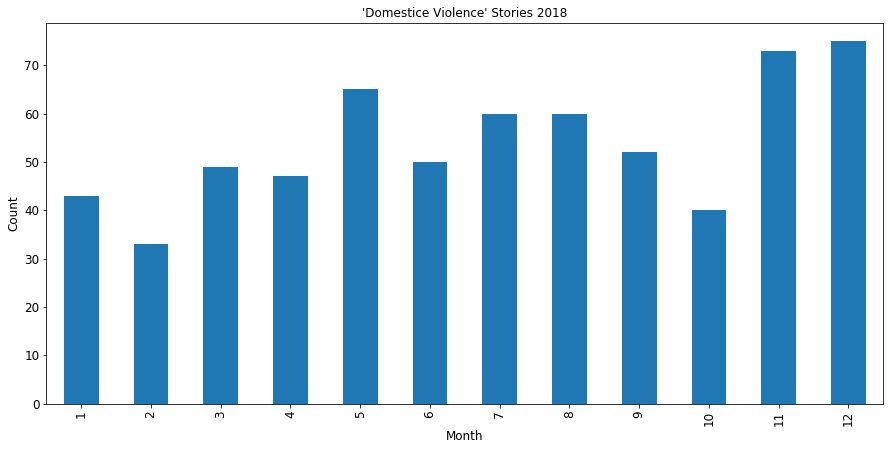

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = df.plot(kind='bar', title ="'Domestice Violence' Stories 2018", figsize=(15, 7), legend=False, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()